In [499]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
from pprint import pprint
import quandl
quandl.ApiConfig.api_key = "Xy5Kqw9-W9DBysWiZFtz"
import datetime
import math

In [500]:
# # Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
# tickers = ['KOTAKBANK', 'LUPIN']
# # Define which online source one should use
# data_source = 'yahoo'
# # We would like all available data from 01/01/2000 until 12/31/2016.
# start_date = '2000-01-01'
# end_date = '2017-11-30'

# # User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# # Getting just the adjusted closing prices. This will return a Pandas DataFrame
# # The index in this DataFrame is the major index of the panel_data.
# close = panel_data.ix['Close']

# # Getting all weekdays between 01/01/2000 and 12/31/2016
# all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# # How do we align the existing prices in adj_close with our new set of dates?
# # All we need to do is reindex close using all_weekdays as the new index
# close = close.reindex(all_weekdays)

# close.head(10)

In [653]:
def get_stock_close_data(stock, start_date = '2010-01-01', end_date = str(datetime.datetime.now())[:10]):
    data = quandl.get("NSE/"+stock, start_date=start_date, end_date=end_date)
    return data['Close']
def get_stock_data(stock, start_date = '2010-01-01', end_date = str(datetime.datetime.now())[:10]):
    return quandl.get("NSE/"+stock, start_date=start_date, end_date=end_date)

In [502]:
mydata = get_stock_close_data('KOTAKBANK')
mydata.tail()

              Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                           
2017-11-27  1029.9  1041.70  1023.50  1039.65  1036.45              970817.0   
2017-11-28  1036.0  1040.00  1026.10  1027.00  1029.85              734677.0   
2017-11-29  1028.9  1032.85  1022.00  1025.50  1026.25             1414642.0   
2017-11-30  1019.1  1020.40   996.15  1000.55  1000.30             2800528.0   
2017-12-01  1003.0  1011.75  1001.15  1006.00  1005.15             2879595.0   

            Turnover (Lacs)  
Date                         
2017-11-27         10000.68  
2017-11-28          7593.69  
2017-11-29         14555.99  
2017-11-30         28168.46  
2017-12-01         28970.00  


Date
2017-11-27    1036.45
2017-11-28    1029.85
2017-11-29    1026.25
2017-11-30    1000.30
2017-12-01    1005.15
Name: Close, dtype: float64

In [503]:
def get_SMA(data, ndays):
    avg = data.rolling(window=ndays).mean()
    return avg

# Exponentially-weighted Moving Average 
def get_EWMA(data, ndays): 
 avg = data.ewm(span = ndays, min_periods = ndays - 1).mean()
 return avg

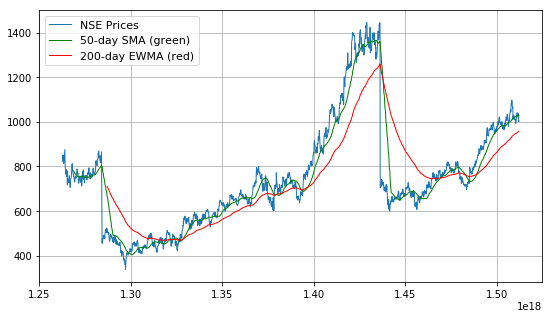

In [504]:
close = mydata

# Compute the 50-day SMA for NIFTY
n = 50
SMA_data = get_SMA(mydata,n)
SMA = SMA_data.dropna()
# print(SMA)

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_data = get_EWMA(mydata,ew)
EWMA = EWMA_data.dropna()

# Plotting the NSE Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(mydata,lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
# plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [505]:
def sell_stock(stock):
    if num(stock)>0:
        print("sell stock "+stock+" immediately")
        
def buy_stock(stock):
    if num(stock)>0:
        print("buy stock "+stock+" immediately")

In [506]:
def get_stocks():
    return ['KOTAKBANK', 'LUPIN']

In [576]:
def current_greater_50_200_moving_average_decision(data):
    global CASH
    #Logc: If curr day upcrosses 50 day avg, buy; If curr data downcrosses 50 day avg, sell. Else hold
    sma_50_d_1 = get_SMA(data[-51:-1], 50)[-1]
    sma_50_d = get_SMA(data[-50:], 50)[-1]
    sma_200_d_1 = get_SMA(data[-201:-1], 200)[-1]
    sma_200_d = get_SMA(data[-200:],200)[-1]
    curr_price = data[-1]
    curr_price_1 = data[-2]
#     print(sma_50_d_1, sma_50_d, sma_200_d_1, sma_200_d)
    if ( curr_price > sma_50_d  ) & ( curr_price > sma_200_d ):
#         print("Buy on "+str(data.index[-1])[:10]+" | "+str(sma_50_d)+" | "+str(sma_200_d)+" | "+str(curr_price))
        return "BUY", data[-1]
    if ( curr_price_1 < sma_200_d ):
#         print("Sell on "+str(data.index[-1])[:10]+" | "+str(sma_50_d)+" | "+str(sma_200_d)+" | "+str(curr_price))
        return "SELL", data[-1]
    else:
        return "HOLD", data[-1]

In [577]:
def day50_current_moving_average_decision(data):
    global CASH
    #Logc: If curr day upcrosses 50 day avg, buy; If curr data downcrosses 50 day avg, sell. Else hold
    sma_50_d_1 = get_SMA(data[-51:-1], 50)[-1]
    sma_50_d = get_SMA(data[-50:], 50)[-1]
    sma_200_d_1 = get_SMA(data[-201:-1], 200)[-1]
    sma_200_d = get_SMA(data[-200:],200)[-1]
    curr_price = data[-1]
    curr_price_1 = data[-2]
#     print(sma_50_d_1, sma_50_d, sma_200_d_1, sma_200_d)
    if ( curr_price_1 < sma_50_d_1 ) & ( curr_price >= sma_50_d ):
#         print("Buy on "+str(data.index[-1])[:10]+" | "+str(sma_50_d_1)+" | "+str(sma_50_d)+" | "+str(curr_price))
        return "BUY", data[-1]
    if ( curr_price_1 > sma_50_d_1 ) & ( curr_price <= sma_50_d ):
#         print("Sell on "+str(data.index[-1])[:10]+" | "+str(sma_50_d_1)+" | "+str(sma_50_d)+" | "+str(curr_price))
        return "SELL", data[-1]
    else:
        return "HOLD", data[-1]

In [609]:
def day50_200_moving_average_decision(data):
    global CASH
    #Logc: If 50 day avg upcrosses 200 day avg, buy; If 50  day avg downcrosses  200 day avg, sell
    sma_50_d_1 = get_SMA(data[-51:-1], 50)[-1]
    sma_50_d = get_SMA(data[-50:], 50)[-1]
    sma_200_d_1 = get_SMA(data[-201:-1], 200)[-1]
    sma_200_d = get_SMA(data[-200:],200)[-1]
#     print(sma_50_d_1, sma_50_d, sma_200_d_1, sma_200_d)
    if ( sma_50_d_1 < sma_200_d_1 ) & ( sma_50_d >= sma_200_d ):
        print("Buy on "+str(data.index[-1])[:10]+" | "+str(sma_50_d_1)+" | "+str(sma_50_d)+" | "+str(sma_200_d_1)+" | "+str(sma_200_d))
        return "BUY", data[-1]
    if ( sma_50_d_1 > sma_200_d_1 ) & ( sma_50_d <= sma_200_d ):
        print("Sell on "+str(data.index[-1])[:10]+" | "+str(sma_50_d_1)+" | "+str(sma_50_d)+" | "+str(sma_200_d_1)+" | "+str(sma_200_d))
        return "SELL", data[-1]
    else:
        return "HOLD", data[-1]

In [606]:
def store_cur_investment(stock_name, quantity, price):
    columns=['timestamp', 'stock', 'quantity', 'price']
    global inv
    try:
        inv
    except:
        inv = pd.DataFrame({'timestamp':datetime.datetime.now(),'stock': stock_name,'quantity': 0, 'price':0},index=[0])
    if(quantity>0):
        q = get_cur_investment(stock_name)
    else:
        q=0
    df = pd.DataFrame({'timestamp':datetime.datetime.now(),'stock': stock_name, 'quantity': quantity+q,\
                       'price':price}, index=[len(inv)])
    inv = inv.append(df)
    print("Added new investment row")
    print(inv[-1:])

In [541]:
def get_cur_investment(stock_name):
    global inv
    try:
        return int(inv.quantity.values[inv['stock']==stock_name][-1])
    except:
        return 0

In [597]:
def buy_stock(stock_name, price):
    global CASH
    stocks_bought = math.floor(CASH/price)
    CASH = CASH - (stocks_bought*price)
    if(stocks_bought>0):
        print(str(stocks_bought)+" number of "+str(stock_name)+" bought at Rs. "+str(price)+". Available Cash Rs. "+str(CASH))
    return stocks_bought

In [598]:
def sell_stock(stock_name, quantity, price):
    global CASH
    CASH = CASH + (quantity*price)
    print(str(quantity)+" number of "+str(stock_name)+" sold at Rs. "+str(price)+". Available Cash Rs. "+str(CASH))

In [584]:
def get_portfolio_value(stock, stock_price):
    global CASH
    #Portfolio has cash plus current value of all stocks
    stock_value = stock_price * get_cur_investment(stock)
    return CASH + stock_value

In [680]:
def backtester_moving_avg(stock_name,data):
    #Logic: buy if price is greater than x day average. Sell if price < x day average. Hold otherwise
    x=50
    y=200
    #d is the rs buffer above the current price
    d=0
    data['x'] = np.round(data['Close'].rolling(window=x).mean(),2)
    data['y'] = np.round(data['Close'].rolling(window=y).mean(),2)
#     data[['Close','x']].plot(grid=True,figsize=(15,8))
    data['x-y'] = data['x']-data['y']
    data['Stance'] = np.where(data['x-y']>d,1,0)
    data['Stance'] = np.where(data['x-y']<d,-1,data['Stance'])
#     data['Stance'].plot(lw=1.5,ylim=[-1.1,1.1])
    data['Market Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['Strategy'] = data['Market Returns'] * data['Stance'].shift(1)
    data[['Market Returns','Strategy']].cumsum().plot(grid=True,figsize=(15,8))
    plt.title(stock_name)
#     print(data.tail())
    plt.show()

In [625]:
def backtester(stock_name, start_date = '2015-01-01', end_date = str(datetime.datetime.now())[:10]):
    stock_data = get_stock_close_data(stock_name, start_date)
    chart_50_200_MA(stock_data)
    print("Found data for "+stock_name+" from "+str(stock_data.index[0])[:10]+" to "+str(stock_data.index[-1])[:10])
    print("Testing 50 day Moving Averages")
    print("starting Investment = 100000, starting date = "+start_date)
    global Investment
    global CASH
    CASH = 100000
    #From start date, run through the algorithm everyday to predict the investment
    i=201
    while i<stock_data.shape[0]:
#         result,price = day50_200_moving_average_decision(stock_data[:i])
#         result,price = day50_current_moving_average_decision(stock_data[:i])
        result, price = current_greater_50_200_moving_average_decision(stock_data[:i])
        if result == "BUY":
            quantity = buy_stock(stock_name, price)
            if int(quantity)>0:
                store_cur_investment(stock_name, quantity, price)
        elif result == "SELL":
            quantity = get_cur_investment(stock_name)
            if int(quantity)>0:
                sell_stock(stock_name, quantity, price)
                store_cur_investment(stock_name, 0, price)
        else:
#             print("Holding Stock "+str(stock_name))
            pass
        i = i+1
    print ("##############################################")
    print("Portfolio value for investment in "+str(stock_name)+" = Rs. "+str(get_portfolio_value(stock_name, stock_data[-1])))

In [650]:
def chart_50_200_MA(data):
#     print(data['Close'])
    n = 50
    SMA_data = get_SMA(mydata,n)
    SMA = SMA_data.dropna()

    n = 200
    SMA200_data = get_SMA(mydata,n)
    SMA200 = SMA200_data.dropna()
#     # Compute the 200-day EWMA for NIFTY
#     ew = 200
#     EWMA_data = get_EWMA(mydata,ew)
#     EWMA = EWMA_data.dropna()
    # Plotting the NSE Price Series chart and Moving Averages below
    plt.figure(figsize=(20,10))
    plt.plot(x=data.index,y=data,lw=1, label='NSE Prices')
    plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
    plt.plot(SMA200,'r', lw=1, label='200-day SMA (red)')
    plt.legend(loc=2,prop={'size':11})
    plt.grid(True)
    # plt.setp(plt.gca().get_xticklabels(), rotation=30)
    plt.show()

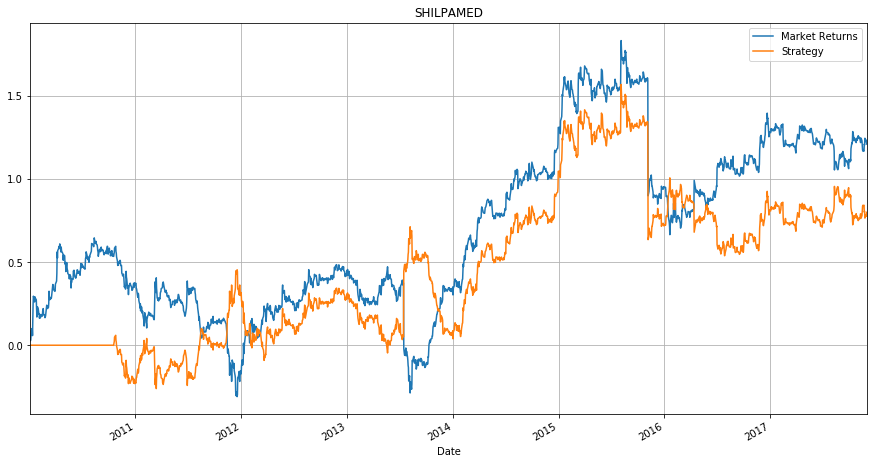

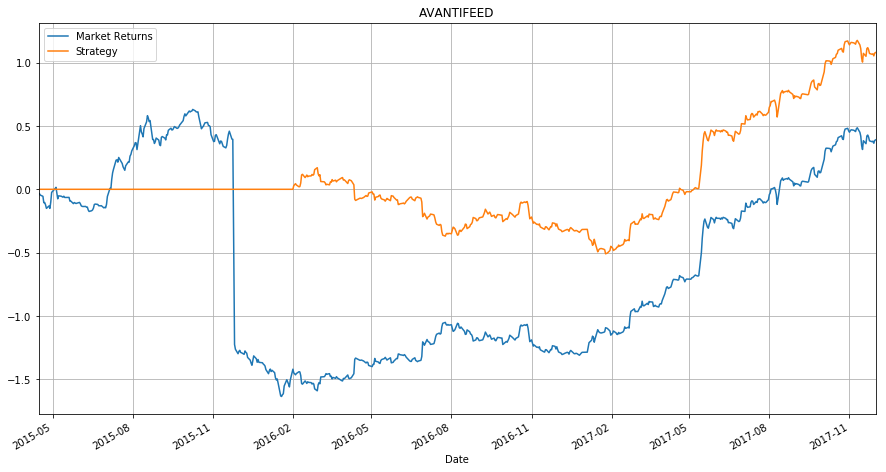

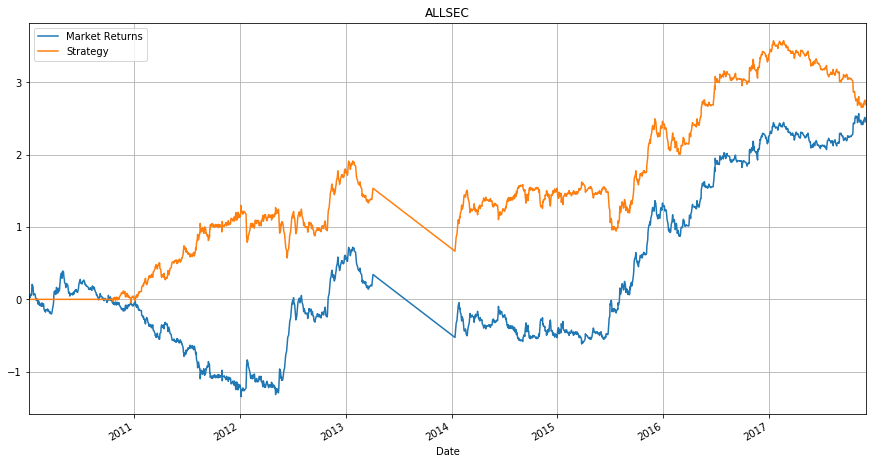

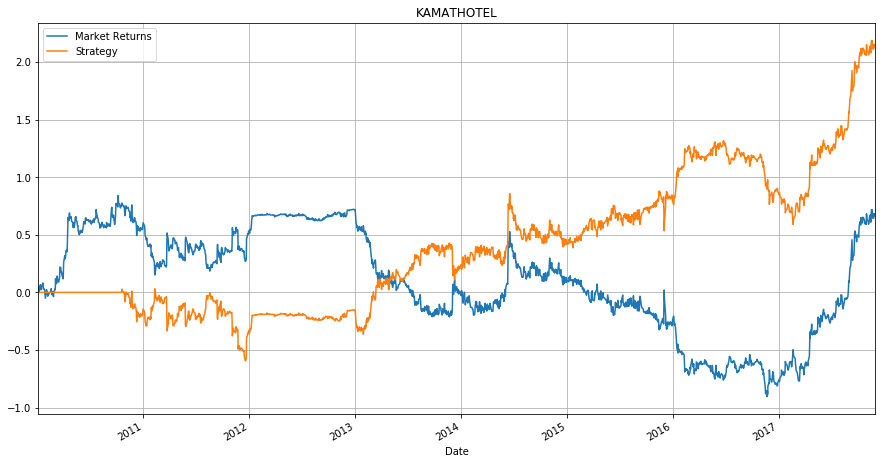

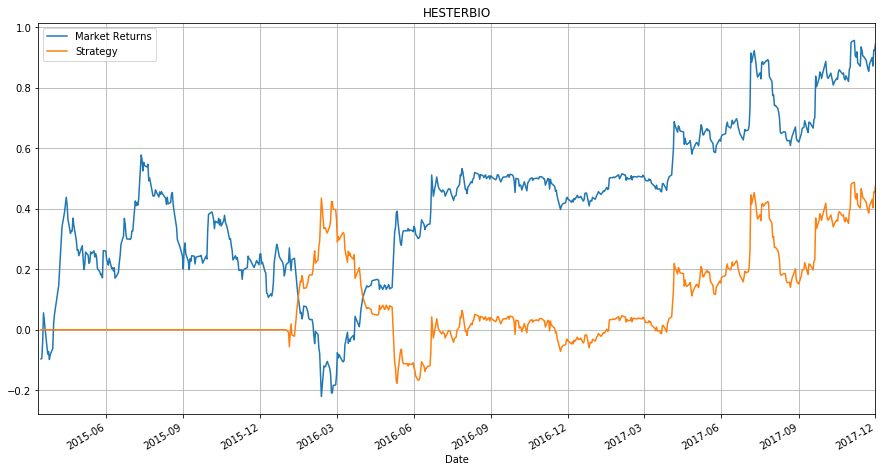

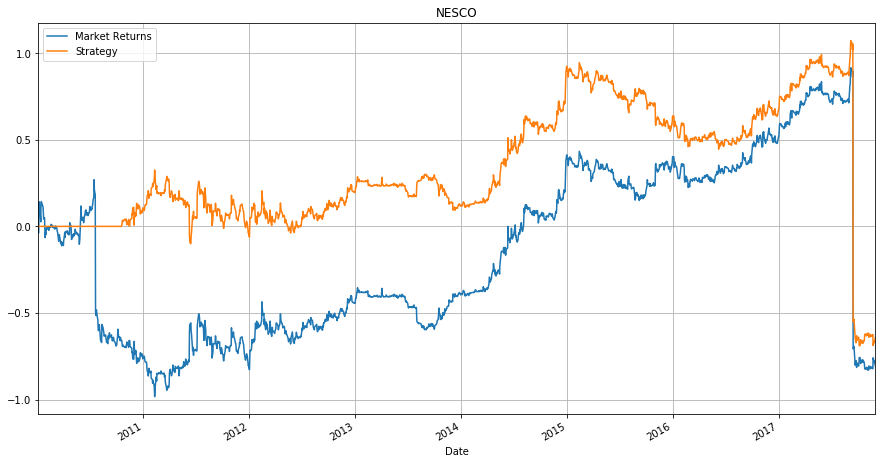

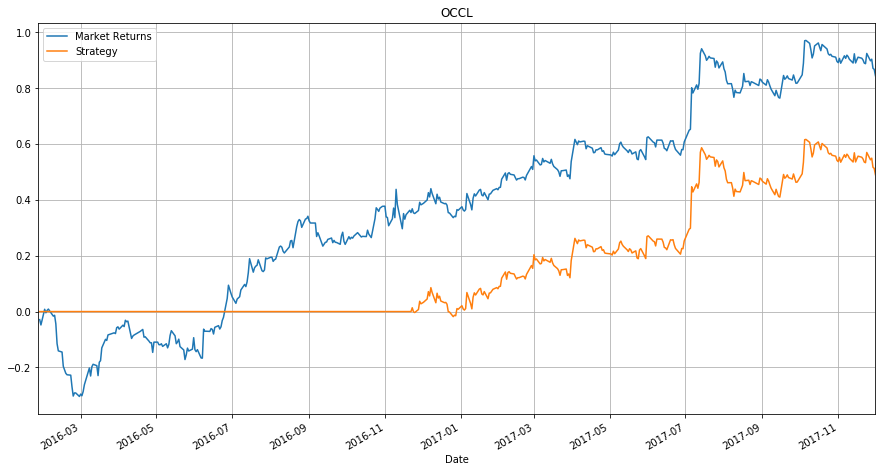

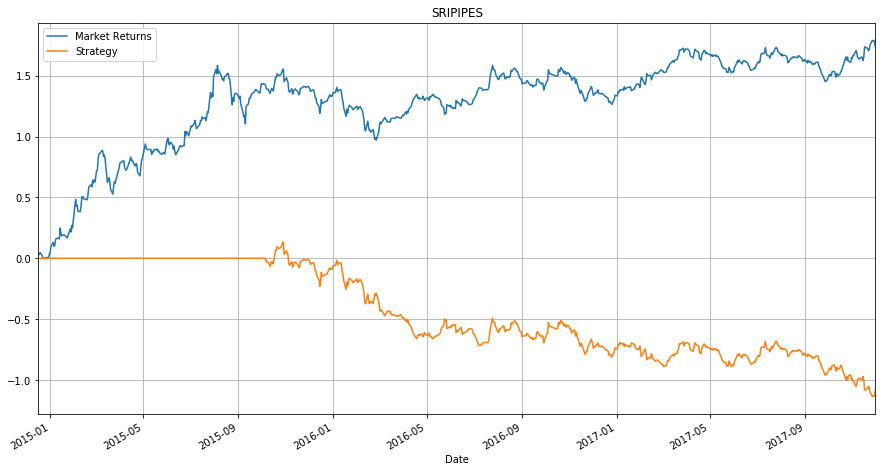

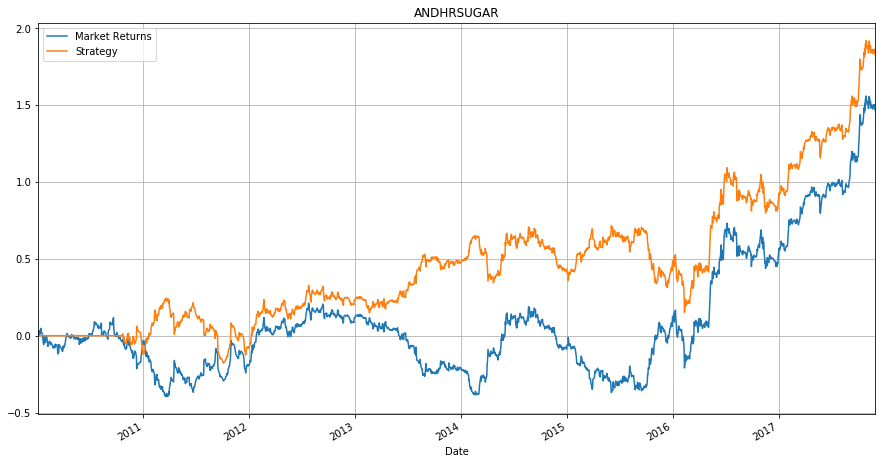

In [681]:
# backtester('AVANTIFEED')
# backtester('ALLSEC')
# backtester('KAMATHOTEL')
# backtester('HESTERBIO')
# backtester('NESCO')
# backtester('OCCL')
# backtester('SHILPAMED')
# backtester('SRIPIPES')
# backtester('ANDHRSUGAR')
backtester_moving_avg('SHILPAMED',get_stock_data('SHILPAMED'))
backtester_moving_avg('AVANTIFEED',get_stock_data('AVANTIFEED'))
backtester_moving_avg('ALLSEC',get_stock_data('ALLSEC'))
backtester_moving_avg('KAMATHOTEL',get_stock_data('KAMATHOTEL'))
backtester_moving_avg('HESTERBIO',get_stock_data('HESTERBIO'))
backtester_moving_avg('NESCO',get_stock_data('NESCO'))
backtester_moving_avg('OCCL',get_stock_data('OCCL'))
# backtester_moving_avg('SHILPAMED',get_stock_data('SHILPAMED'))
backtester_moving_avg('SRIPIPES',get_stock_data('SRIPIPES'))
backtester_moving_avg('ANDHRSUGAR',get_stock_data('ANDHRSUGAR'))

In [621]:
#Run this cell to cleanup the previously stored data
global inv
inv = pd.DataFrame({'timestamp':datetime.datetime.now(),'stock': 'test','quantity': 0, 'price':0},index=[0])

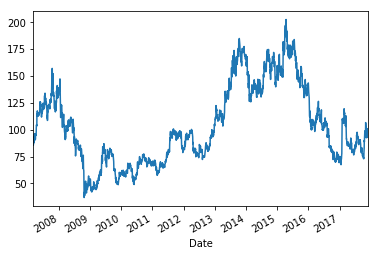

In [634]:
stock_data = get_stock_close_data(stock_name, start_date)
stock_data.plot(x='index', y='Close')
plt.show()
# stock_data.dtypes